# Natural Language Processing (NLP) [Total Marks - 50]

The first and the most important step for any NLP related task is data preprocessing. For this
question, we will try to implement a simple sentiment analysis movie review model. We will be
using the first 10,000 reviews from imdb dataset for this task. Download the dataset and perform 
the following steps:
- 1.
Preprocess the text (i.e., the steps required prior to converting the 
sentence into a vector) using any library of your choice.

- 2.Given any sentence, perform vector semantics i.e., convert the given dataset
into vectors using Bag of Words approach.
- 3.Train a simple classifier (using Scikit-learn e.g.: SVM) to perform 
sentiment analysis on the generated dataset.
- 4.
Repeat the above process again but now using word2vector. (for 
any sentence, take average of the vector representation of all the tokens to 
get the vector representation)
- 5.Bonus: Mention the insights that you can derive from the movie reviews. 
(you are free to use any techniques)




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshay0909\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akshay0909\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
from wordcloud import WordCloud

## 1 Preprocess the text (i.e., the steps required prior to converting the  sentence into a vector) using any library of your choice.

In [5]:
stop_words = set(stopwords.words('english'))
len(stop_words)

179

In [6]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [8]:
df.shape

(50000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [11]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  418


In [12]:
df = df.drop_duplicates('review')

In [13]:
df.shape

(49582, 2)

Text(0.5, 1.0, 'Sentiment distribution')

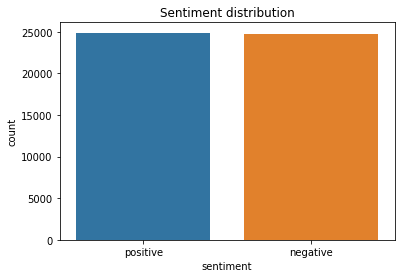

In [14]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

- Looks like a balanced dataset.

In [15]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

### Now lets find the number of words in each review

In [16]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [17]:
df['word count'] = df['review'].apply(no_of_words)

In [18]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

In [19]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

### converting target column into numerical

In [20]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [21]:
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          0         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

In [22]:
def data_processing(text):
    '''
    line 1-# performing lower case conversion
    line 2-# removing the break tags
    line 3-# removing the urls
    line 4-# removing hastags and the add symbol
    line 5_# removing the punctuations 
    
    and then we are removing the stopwords and finally 
    we are returning the process data

    
    '''
    text = text.lower()
    text = re.sub('<br />', '', text) 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) 
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshay0909\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# appplying preprocess function on text data
df.review = df['review'].apply(data_processing)

In [25]:
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         307
1  wonderful little production filming technique ...          1         162
2  thought wonderful way spend time hot summer we...          1         166
3  basically theres family little boy jake thinks...          0         138
4  petter matteis love time money visually stunni...          1         230

In [26]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mann

In [27]:
# steamming
stemmer = PorterStemmer()

def stemming(data):
    text = [stemmer.stem(word) for word in data]
    
    return data

In [28]:
df.review = df['review'].apply(lambda x: stemming(x))

In [29]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          0          67
4  petter matteis love time money visually stunni...          1         125

As we can see the number of words have reduced after applying preprocessing

## Model Building

##  2 Given any sentence, perform vector semantics i.e., convert the given dataset into vectors using Bag of Words approach.


- 1. creating Bag of Words(Count Vectorizer) 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

BOW = CountVectorizer(ngram_range=(1,2),max_features=2500)
X = BOW.fit_transform(df['review']).toarray()

In [31]:
X.shape

(49582, 2500)

In [32]:
Y = df['sentiment']

In [33]:
Y.shape

(49582,)

In [34]:
Y.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

## 3 Train a simple classifier (using Scikit-learn e.g.: SVM) to perform  sentiment analysis on the generated dataset.

In [36]:
from sklearn.svm import SVC

svc_model_2=SVC(kernel="rbf",C=5,gamma=0.001)
svc_model_2.fit(X_train,Y_train)

SVC(C=5, gamma=0.001)

In [37]:
Y_pred_1=svc_model_2.predict(X_test)
print(Y_pred_1)

[1 1 1 ... 1 0 1]


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred_1)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,Y_pred_1))

acc=accuracy_score(Y_test,Y_pred_1)
print("Accuracy of the BOW model : ",acc)

[[4245  664]
 [ 541 4467]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4909
           1       0.87      0.89      0.88      5008

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

Accuracy of the BOW model :  0.8784914792780074


## Creating the TFIDF model

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

TFIDF= TfidfVectorizer(ngram_range=(1,2),max_features=2500)
TFIDF = TFIDF.fit_transform(df['review']).toarray()

In [40]:
from sklearn.svm import SVC

svc_model_3=SVC(kernel="rbf",C=5,gamma=0.001)
svc_model_3.fit(X_train,Y_train)

SVC(C=5, gamma=0.001)

In [41]:
Y_pred_3=svc_model_3.predict(X_test)
print(Y_pred_3)

[1 1 1 ... 1 0 1]


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred_3)
print(cfm)


print("CLASSIFICATION REPORT: ")

print(classification_report(Y_test,Y_pred_3))

acc=accuracy_score(Y_test,Y_pred_3)
print("Accuracy of the TFIDF model : ",acc)

[[4245  664]
 [ 541 4467]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4909
           1       0.87      0.89      0.88      5008

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

Accuracy of the TFIDF model :  0.8784914792780074


## 5 Bonus: Mention the insights that you can derive from the movie reviews. (you are free to use any techniques)


### visualizing the positive and negative reviews using word cloud

In [43]:
#word cloud for positve review
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

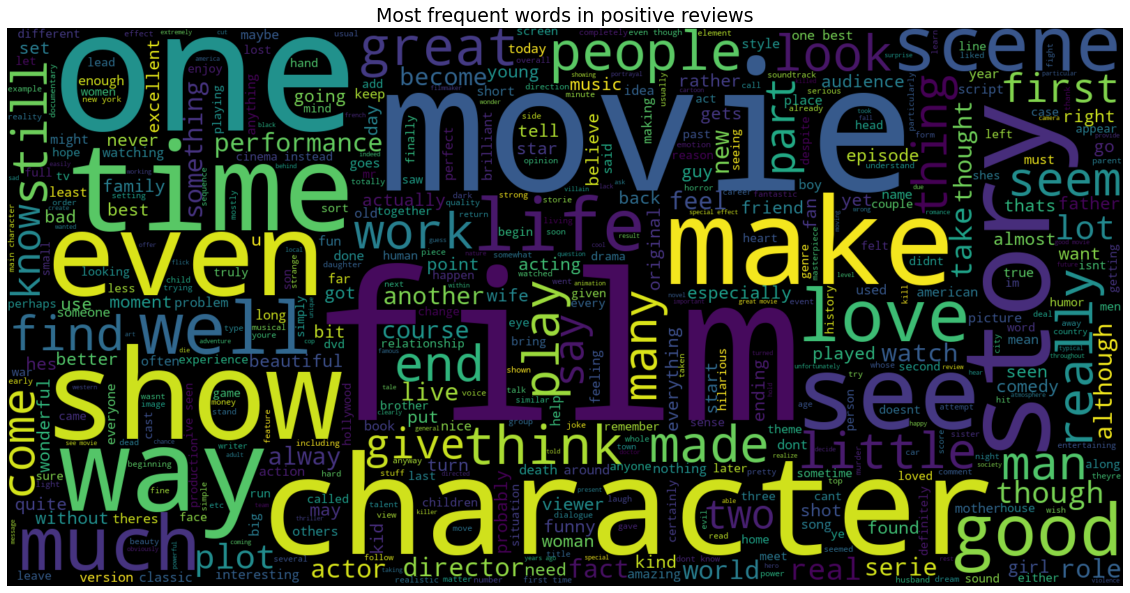

In [44]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [45]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35836),
 ('one', 25621),
 ('like', 16999),
 ('good', 14286),
 ('great', 12570),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10933),
 ('really', 10641),
 ('also', 10517),
 ('would', 10320),
 ('even', 9319),
 ('much', 8971)]

In [46]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35836
2    one  25621
3   like  16999
4   good  14286

In [48]:
pip install plotly


  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [49]:
import plotly.express as px
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

In [50]:
##word cloud for negative review
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          0          67
7   show amazing fresh innovative idea 70s first a...          0          83
8   encouraged positive comments film looking forw...          0          64
10  phil alien one quirky films humour based aroun...          0          51
11  saw movie 12 came recall scariest scene big bi...          0          84

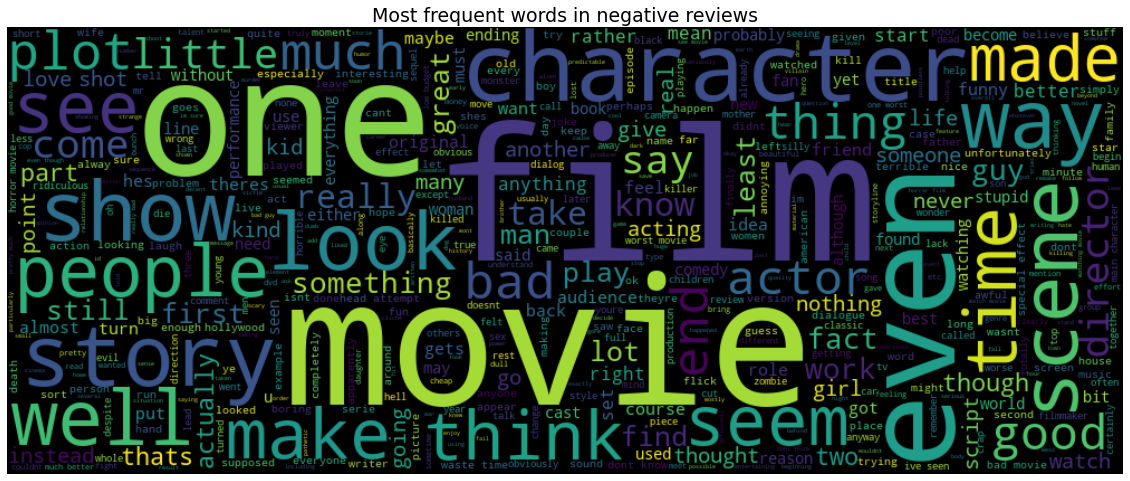

In [51]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1000, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [52]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 47011),
 ('film', 34651),
 ('one', 24364),
 ('like', 21509),
 ('even', 14761),
 ('good', 13997),
 ('bad', 13906),
 ('would', 13483),
 ('really', 12084),
 ('time', 11350),
 ('see', 10413),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9759),
 ('story', 9564)]

In [53]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47011
1   film  34651
2    one  24364
3   like  21509
4   even  14761

In [54]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')